In this notebook, we provide some qualitative analysis of our data. We drop rows with nan values for simplicity (only for visualization).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('whitegrid')

from sklearn.preprocessing import OneHotEncoder

In [2]:
df_train = pd.read_csv("notebook_insights/preprocessed_train.csv")
df_train = df_train.dropna()
df_train.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,...,Student,z_Blue Collar,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Highly Urban/ Urban
0,0,0,60.0,0,11.0,11.117643,0,1.000000,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,43.0,0,11.0,11.423537,0,12.457811,0,0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,35.0,1,10.0,9.682779,0,11.729576,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1,0,34.0,1,12.0,11.738474,1,1.000000,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1,0,34.0,0,10.0,11.050541,0,1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Visualize distribution

We propose first to visualize the distribution of each feature. We see that most of the features are categorical.

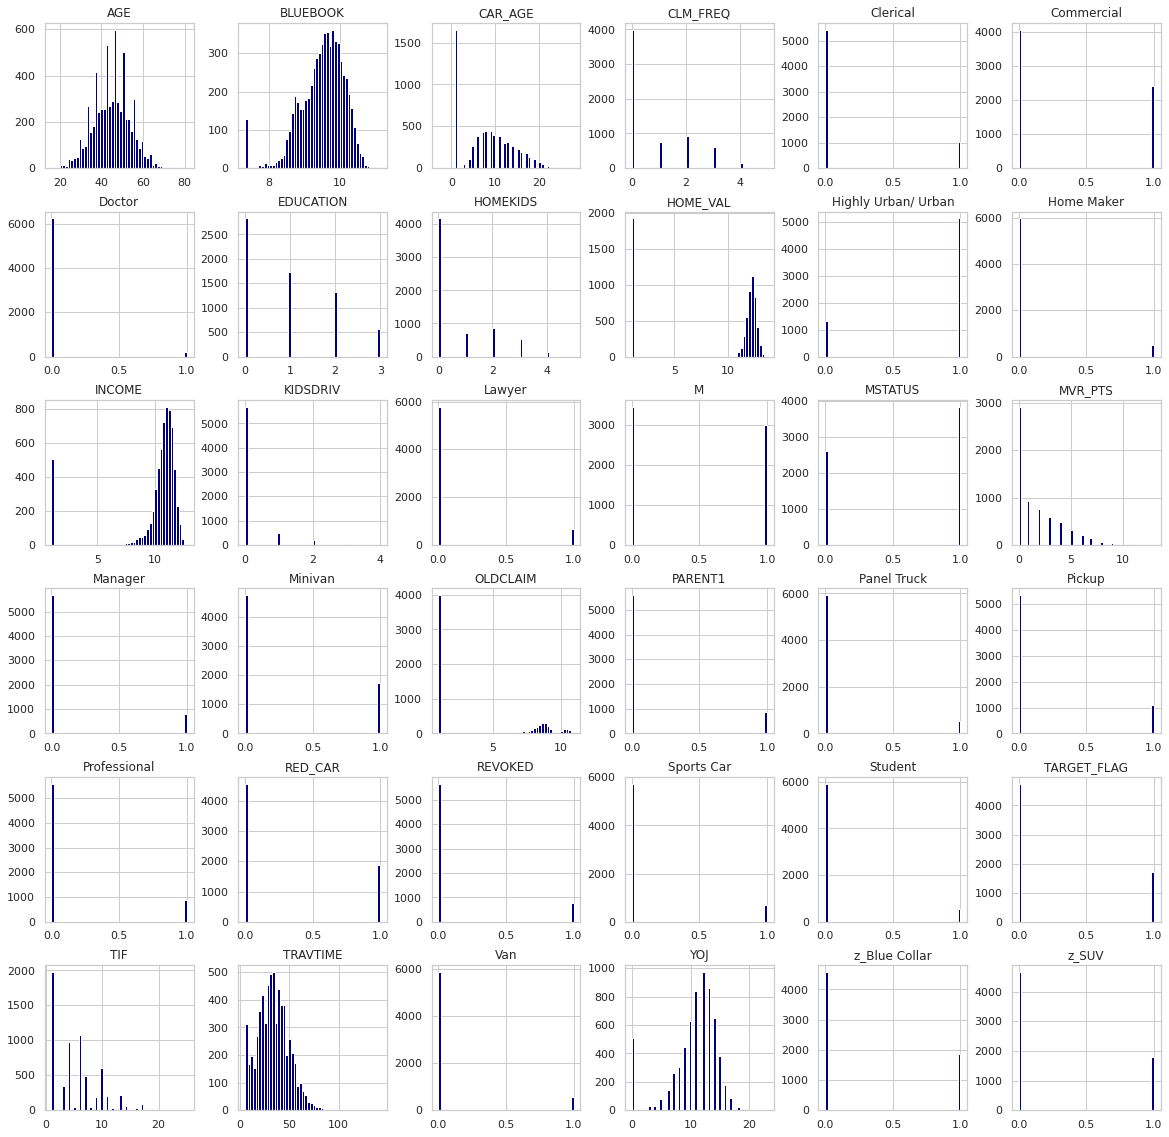

In [3]:
df_train.hist(bins=50, figsize=(20,20), color='navy')
plt.show()

# Impact of some numerical features

The obs with positive and negative target_flag has the same mean for age, YOJ, TRAVTIME, TIF.

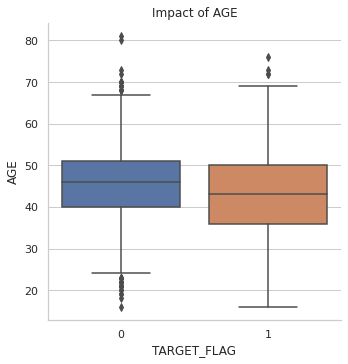

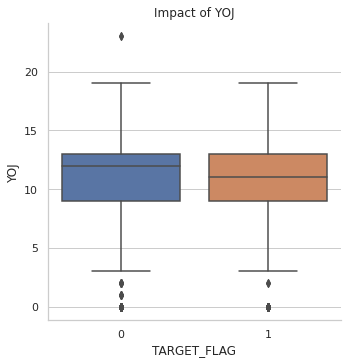

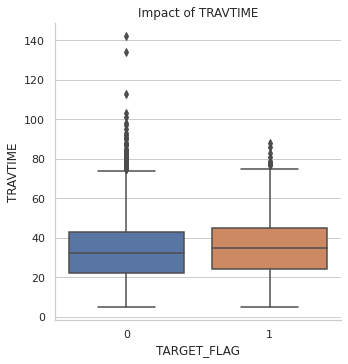

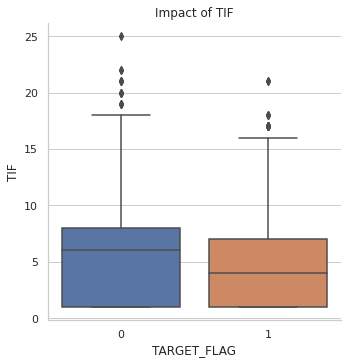

In [4]:
for column in ['AGE',
                'YOJ',
                'TRAVTIME',
                'TIF']:
    
    sns.catplot(data=df_train[['TARGET_FLAG',column]],x='TARGET_FLAG', y=column, kind="box")
    plt.title('Impact of {}'.format(column))
    plt.show()

There are visual differences between the boxplots for the income, home_val, oldclaim, car_age variables.

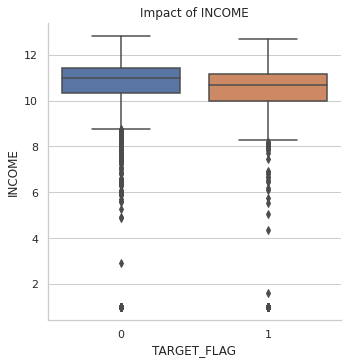

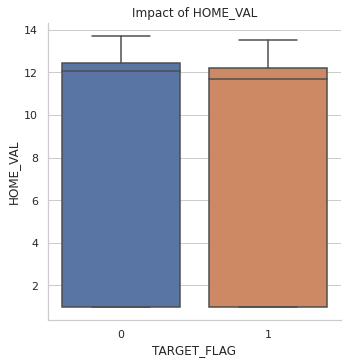

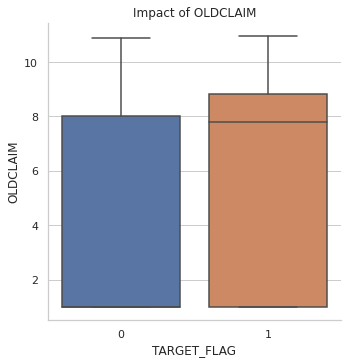

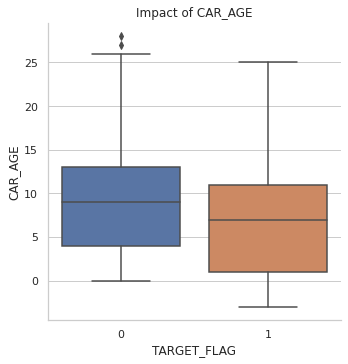

In [5]:
for column in ['INCOME',
                'HOME_VAL',
                'OLDCLAIM',
                'CAR_AGE']:
    
    sns.catplot(data=df_train[['TARGET_FLAG',column]],x='TARGET_FLAG', y=column, kind="box")
    plt.title('Impact of {}'.format(column))
    plt.show()

## Impact of categorical features

Here, we visualize the impact of some categorical features on the target variable. For instance, the feature 'Highly Urban/ Urban' seems highly correlated to the output.

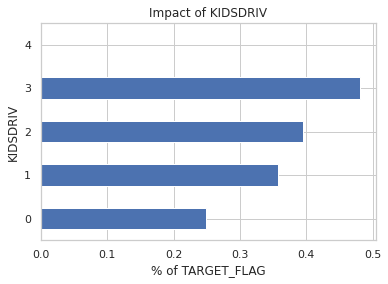

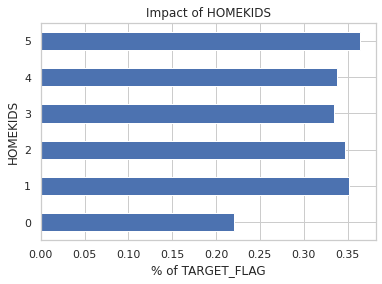

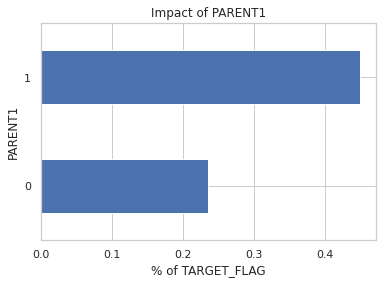

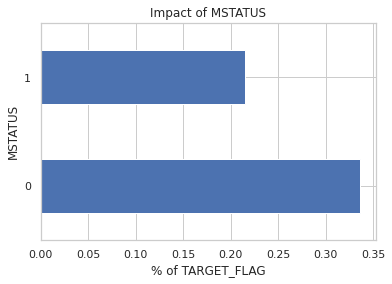

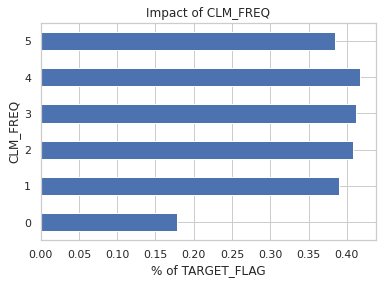

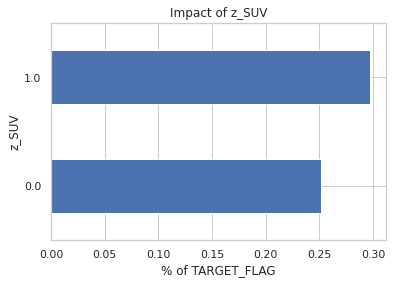

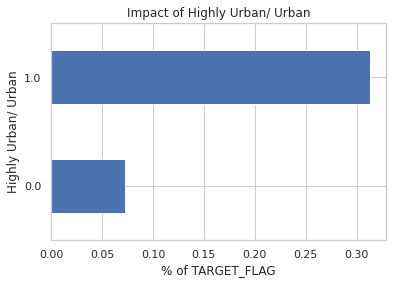

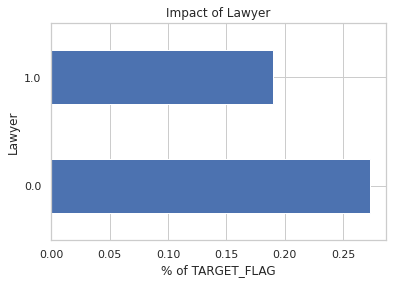

In [6]:
for column in [ 'KIDSDRIV',
            'HOMEKIDS',
            'PARENT1',
            'MSTATUS',
            'CLM_FREQ',
            'z_SUV',
            'Highly Urban/ Urban',
            'Lawyer']:

    df_train.groupby(column).mean()['TARGET_FLAG'].plot.barh()
    plt.xlabel('% of TARGET_FLAG')
    plt.title('Impact of {}'.format(column))
    plt.show()

# Heatmap

We can then visualize the correlation of each feature.

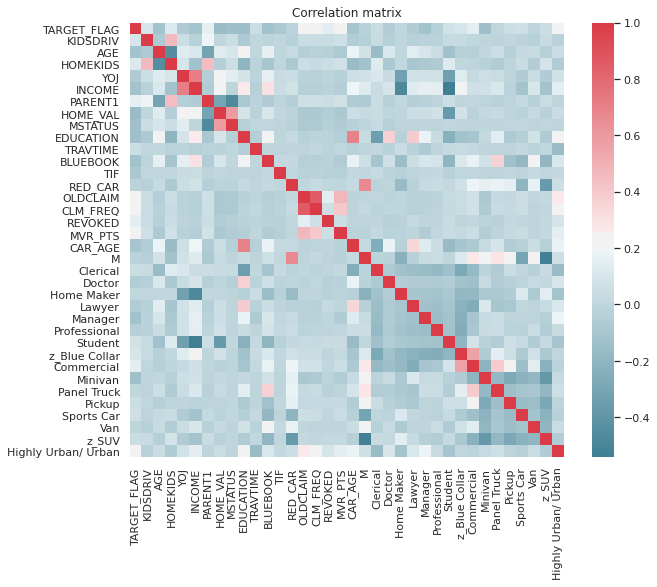

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation matrix')
plt.show()

We focus on correlation between the features and the target variable.

In [8]:
corr.sort_values(by='TARGET_FLAG', ascending=False)['TARGET_FLAG']

TARGET_FLAG            1.000000
OLDCLAIM               0.245106
MVR_PTS                0.225479
CLM_FREQ               0.222084
Highly Urban/ Urban    0.219242
PARENT1                0.164052
REVOKED                0.146289
Commercial             0.144823
HOMEKIDS               0.114991
KIDSDRIV               0.092513
z_Blue Collar          0.091916
Student                0.074061
Sports Car             0.062702
TRAVTIME               0.053116
Pickup                 0.051765
z_SUV                  0.046597
Clerical               0.038105
Home Maker             0.006902
Panel Truck            0.004553
Van                   -0.000485
RED_CAR               -0.015523
M                     -0.021397
Professional          -0.040454
Doctor                -0.052398
Lawyer                -0.057591
YOJ                   -0.065745
TIF                   -0.078964
CAR_AGE               -0.106247
INCOME                -0.111852
AGE                   -0.112937
Manager               -0.115218
BLUEBOOK

We may drop the features with small correlation with the target variable.

In [9]:
corr_values      = np.abs(corr['TARGET_FLAG'])
low_corr_bool    = corr_values < 0.08
low_corr_columns = corr_values[low_corr_bool].index
print(low_corr_columns)

Index(['YOJ', 'TRAVTIME', 'TIF', 'RED_CAR', 'M', 'Clerical', 'Doctor',
       'Home Maker', 'Lawyer', 'Professional', 'Student', 'Panel Truck',
       'Pickup', 'Sports Car', 'Van', 'z_SUV'],
      dtype='object')


# TSNE

We can visualize a 2D projection to get a summary of the data. To this end, we can either use PCA or TSNE.

In [10]:
TARGET = 'TARGET_FLAG'
y = df_train[TARGET].values
df_train.drop(columns=TARGET, inplace=True)
df_train.reset_index(inplace=True)
X = df_train
X = X.drop(columns=low_corr_columns)
X = X.drop(columns=['index'])
X.head()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,BLUEBOOK,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Manager,z_Blue Collar,Commercial,Minivan,Highly Urban/ Urban
0,0,60.0,0,11.117643,0,1.000000,0,3,9.563108,8.403128,2,0,3,18.0,0.0,0.0,0.0,1.0,1.0
1,0,43.0,0,11.423537,0,12.457811,0,0,9.611797,1.000000,0,0,0,1.0,0.0,1.0,1.0,1.0,1.0
2,0,35.0,1,9.682779,0,11.729576,1,0,8.296547,10.563336,2,0,3,10.0,0.0,0.0,0.0,0.0,1.0
3,0,34.0,1,11.738474,1,1.000000,0,1,9.765948,1.000000,0,0,0,7.0,0.0,1.0,1.0,0.0,1.0
4,0,34.0,0,11.050541,0,1.000000,0,1,9.323669,1.000000,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


We need to preprocess the data in order to enhance the projection quality.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

# Preprocessing
numeric_features = ['AGE',
                    'INCOME',
                    'HOME_VAL',
                    'BLUEBOOK',
                    'OLDCLAIM',
                    'CAR_AGE']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),],
    remainder='passthrough')

X = preprocessor.fit_transform(X)

# TSNE: Projection into 2D Space

X_embedded = TSNE(n_components=2).fit_transform(X)

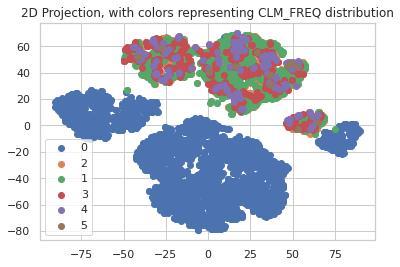

In [12]:
LABEL = 'CLM_FREQ'
values = df_train[LABEL].value_counts().index
for value in values:
    idx = df_train[(df_train[LABEL] == value)].index
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=value)
    idx = np.where(df_train[LABEL] == value)[0]
plt.legend()
plt.title('2D Projection, with colors representing {} distribution'.format(LABEL))
plt.show()